In [1]:
import time
import numpy as np
import pandas as pd

import galsim #install with conda install -c conda_forge galsim

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as norm
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline #This allows one to build different steps together
from sklearn.preprocessing import StandardScaler, RobustScaler

from tqdm import tqdm 

import target_predicting_ML_functions_and_feature_ranking as functions
import RF_target_predicting_and_learning_curves_functions as tp_lc_functions

### <font color='purple'> <a id =10> </a> <br> RF & Feature Ranking by morphology: Group 8 Galaxies, 0.7<$\frac{M_{bulge}}{M_{star}}$<0.8

In [2]:
import os
# os.mkdir('TNG300-SAM_images/v7_TNG300-SAM_df_8')

In [3]:
df_8 = pd.read_csv('TNG300-SAM_images/v6_TNG300-SAM_Morphologies_definition/df_8_Normalized_as_defined_in_TNG300notebook_v6')
df_8_raw = pd.read_csv('TNG300-SAM_images/v6_TNG300-SAM_Morphologies_definition/df_8_Raw_as_defined_in_TNG300notebook_v6')
print("df_8.shape", df_8.shape)
print("df_8_raw.shape", df_8_raw.shape)

df_8.shape (6853, 38)
df_8_raw.shape (6853, 59)


In [4]:
X_8 = df_8.drop(columns=['GalpropNormHalfRadius', 'BulgeMstar_ratio',
                         'GalpropNormMdisk', 'DiskMstar_ratio'])
 

y_8 = df_8.loc[:,'GalpropNormHalfRadius']

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.8329 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
RF Accuracy: 0.83 (+/- 0.03)


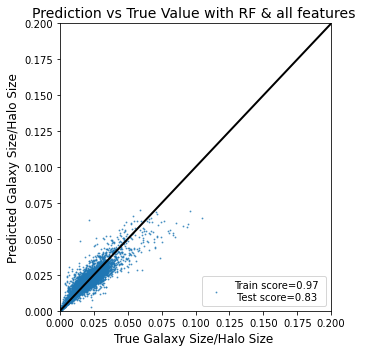

Elapsed time to compute the importances: 0.015 seconds
Elapsed time to compute the importances: 6.162 seconds


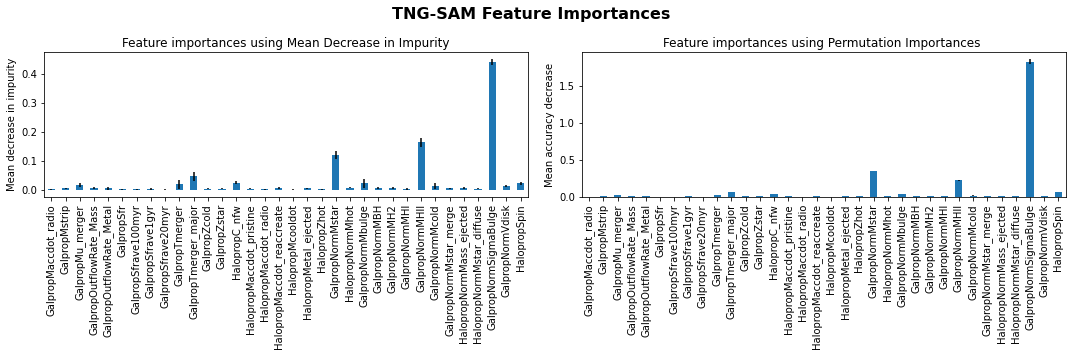

  0%|                                                    | 0/34 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▎                                          | 1/34 [00:01<00:34,  1.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▌                                         | 2/34 [00:02<00:35,  1.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|███▉                                        | 3/34 [00:03<00:36,  1.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▏                                      | 4/34 [00:04<00:34,  1.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▍                                     | 5/34 [00:05<00:33,  1.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 6/34 [00:06<00:32,  1.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 7/34 [00:07<00:30,  1.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▎                                 | 8/34 [00:09<00:29,  1.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▋                                | 9/34 [00:10<00:28,  1.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▋                              | 10/34 [00:11<00:25,  1.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▉                             | 11/34 [00:12<00:24,  1.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                           | 12/34 [00:13<00:23,  1.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▍                          | 13/34 [00:14<00:23,  1.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▋                         | 14/34 [00:15<00:21,  1.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 15/34 [00:16<00:18,  1.03it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▏                      | 16/34 [00:17<00:18,  1.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 17/34 [00:18<00:18,  1.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▊                    | 18/34 [00:19<00:14,  1.11it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 19/34 [00:20<00:15,  1.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▎                 | 20/34 [00:21<00:15,  1.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▌                | 21/34 [00:23<00:15,  1.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▊               | 22/34 [00:24<00:14,  1.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████              | 23/34 [00:25<00:13,  1.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▎            | 24/34 [00:26<00:11,  1.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▌           | 25/34 [00:27<00:09,  1.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▉          | 26/34 [00:28<00:08,  1.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████▏        | 27/34 [00:29<00:07,  1.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▍       | 28/34 [00:30<00:06,  1.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 29/34 [00:32<00:06,  1.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▉     | 30/34 [00:33<00:05,  1.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████▏   | 31/34 [00:35<00:03,  1.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 32/34 [00:36<00:02,  1.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 33/34 [00:37<00:01,  1.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 34/34 [00:38<00:00,  1.14s/it]


1. iteration: 
	 1 GalpropNormSigmaBulge 0.4052934568211361


  0%|                                                    | 0/33 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▎                                          | 1/33 [00:01<00:59,  1.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▋                                         | 2/33 [00:03<00:59,  1.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████                                        | 3/33 [00:05<00:57,  1.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 4/33 [00:07<00:56,  1.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▋                                     | 5/33 [00:09<00:53,  1.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|████████                                    | 6/33 [00:11<00:49,  1.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▎                                  | 7/33 [00:13<00:49,  1.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▋                                 | 8/33 [00:15<00:47,  1.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|████████████                                | 9/33 [00:17<00:45,  1.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                              | 10/33 [00:18<00:42,  1.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 11/33 [00:20<00:40,  1.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▋                           | 12/33 [00:22<00:39,  1.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 13/33 [00:24<00:37,  1.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 14/33 [00:26<00:34,  1.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▌                       | 15/33 [00:27<00:31,  1.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 16/33 [00:29<00:29,  1.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 17/33 [00:31<00:28,  1.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▍                   | 18/33 [00:32<00:24,  1.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▊                  | 19/33 [00:34<00:23,  1.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 20/33 [00:36<00:23,  1.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▎               | 21/33 [00:38<00:23,  1.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 22/33 [00:40<00:21,  1.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|█████████████████████████████▉             | 23/33 [00:42<00:20,  2.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▎           | 24/33 [00:45<00:18,  2.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 25/33 [00:47<00:16,  2.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▉         | 26/33 [00:49<00:14,  2.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▏       | 27/33 [00:51<00:12,  2.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▍      | 28/33 [00:53<00:10,  2.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▊     | 29/33 [00:54<00:07,  1.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████    | 30/33 [00:56<00:05,  1.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 31/33 [00:58<00:03,  1.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 32/33 [01:00<00:01,  1.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 33/33 [01:02<00:00,  1.89s/it]


2. iteration: 
	 1 GalpropNormSigmaBulge 0.4052934568211361
	 2 GalpropNormMstar 0.6040781082496883


  0%|                                                    | 0/32 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/32 [00:02<01:25,  2.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/32 [00:05<01:17,  2.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████▏                                       | 3/32 [00:07<01:17,  2.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▌                                      | 4/32 [00:10<01:15,  2.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|██████▉                                     | 5/32 [00:13<01:15,  2.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▎                                   | 6/32 [00:16<01:14,  2.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▋                                  | 7/32 [00:19<01:09,  2.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 8/32 [00:22<01:06,  2.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▍                               | 9/32 [00:24<01:03,  2.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▍                             | 10/32 [00:27<01:00,  2.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 11/32 [00:30<00:56,  2.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▏                          | 12/32 [00:32<00:53,  2.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▍                         | 13/32 [00:35<00:51,  2.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▊                        | 14/32 [00:38<00:49,  2.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▏                      | 15/32 [00:41<00:46,  2.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 16/32 [00:43<00:43,  2.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▊                    | 17/32 [00:46<00:40,  2.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████▏                  | 18/32 [00:48<00:35,  2.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▌                 | 19/32 [00:50<00:31,  2.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▉                | 20/32 [00:53<00:29,  2.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 21/32 [00:56<00:28,  2.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▌             | 22/32 [00:58<00:25,  2.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 23/32 [01:01<00:23,  2.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 24/32 [01:03<00:20,  2.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▌         | 25/32 [01:06<00:18,  2.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▉        | 26/32 [01:09<00:15,  2.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████▎      | 27/32 [01:11<00:13,  2.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▋     | 28/32 [01:14<00:10,  2.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|██████████████████████████████████████▉    | 29/32 [01:16<00:07,  2.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▎  | 30/32 [01:19<00:05,  2.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 31/32 [01:21<00:02,  2.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 32/32 [01:24<00:00,  2.64s/it]


3. iteration: 
	 1 GalpropNormSigmaBulge 0.4052934568211361
	 2 GalpropNormMstar 0.6040781082496883
	 3 GalpropNormMHII 0.768888785529549


  0%|                                                    | 0/31 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/31 [00:03<01:41,  3.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/31 [00:06<01:40,  3.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▎                                       | 3/31 [00:10<01:37,  3.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▋                                      | 4/31 [00:13<01:33,  3.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 5/31 [00:17<01:29,  3.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▌                                   | 6/31 [00:20<01:25,  3.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|█████████▉                                  | 7/31 [00:24<01:21,  3.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▎                                | 8/31 [00:27<01:18,  3.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▊                               | 9/31 [00:30<01:15,  3.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▊                             | 10/31 [00:34<01:11,  3.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▎                           | 11/31 [00:37<01:04,  3.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▋                          | 12/31 [00:40<01:02,  3.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████                         | 13/31 [00:44<01:00,  3.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▍                       | 14/31 [00:46<00:54,  3.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 15/31 [00:50<00:51,  3.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 16/31 [00:52<00:46,  3.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▌                   | 17/31 [00:56<00:44,  3.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▉                  | 18/31 [00:59<00:40,  3.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▎                | 19/31 [01:02<00:38,  3.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▋               | 20/31 [01:06<00:36,  3.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 21/31 [01:09<00:33,  3.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▌            | 22/31 [01:12<00:30,  3.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▉           | 23/31 [01:15<00:25,  3.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▎         | 24/31 [01:19<00:22,  3.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 25/31 [01:22<00:19,  3.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 26/31 [01:25<00:16,  3.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▍     | 27/31 [01:29<00:13,  3.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▊    | 28/31 [01:32<00:10,  3.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▏  | 29/31 [01:36<00:06,  3.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 30/31 [01:39<00:03,  3.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 31/31 [01:42<00:00,  3.31s/it]


4. iteration: 
	 1 GalpropNormSigmaBulge 0.4052934568211361
	 2 GalpropNormMstar 0.6040781082496883
	 3 GalpropNormMHII 0.768888785529549
	 4 HalopropC_nfw 0.8110192229923593


  0%|                                                    | 0/30 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/30 [00:04<02:03,  4.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|██▉                                         | 2/30 [00:08<01:58,  4.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▍                                       | 3/30 [00:12<01:54,  4.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▊                                      | 4/30 [00:17<01:50,  4.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 5/30 [00:21<01:47,  4.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 6/30 [00:25<01:43,  4.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▎                                 | 7/30 [00:29<01:38,  4.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▋                                | 8/30 [00:34<01:34,  4.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▏                              | 9/30 [00:38<01:30,  4.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 10/30 [00:42<01:26,  4.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▊                           | 11/30 [00:47<01:21,  4.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 12/30 [00:51<01:17,  4.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▋                        | 13/30 [00:55<01:12,  4.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████                       | 14/30 [00:59<01:06,  4.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 15/30 [01:03<01:02,  4.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▉                    | 16/30 [01:08<00:59,  4.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▎                  | 17/30 [01:11<00:51,  3.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 18/30 [01:16<00:49,  4.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████▏               | 19/30 [01:20<00:44,  4.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 20/30 [01:24<00:41,  4.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████             | 21/30 [01:28<00:37,  4.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▌           | 22/30 [01:32<00:33,  4.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|████████████████████████████████▉          | 23/30 [01:36<00:28,  4.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 24/30 [01:40<00:24,  4.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 25/30 [01:44<00:20,  4.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▎     | 26/30 [01:49<00:16,  4.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▋    | 27/30 [01:53<00:12,  4.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████▏  | 28/30 [01:58<00:08,  4.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 29/30 [02:02<00:04,  4.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 30/30 [02:06<00:00,  4.22s/it]


5. iteration: 
	 1 GalpropNormSigmaBulge 0.4052934568211361
	 2 GalpropNormMstar 0.6040781082496883
	 3 GalpropNormMHII 0.768888785529549
	 4 HalopropC_nfw 0.8110192229923593
	 5 GalpropMu_merger 0.8227236630375273


  0%|                                                    | 0/29 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▌                                          | 1/29 [00:05<02:23,  5.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███                                         | 2/29 [00:10<02:19,  5.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▌                                       | 3/29 [00:15<02:11,  5.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████                                      | 4/29 [00:20<02:06,  5.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▌                                    | 5/29 [00:24<01:53,  4.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 6/29 [00:29<01:50,  4.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 7/29 [00:34<01:46,  4.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▏                               | 8/29 [00:39<01:43,  4.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▋                              | 9/29 [00:44<01:39,  4.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 10/29 [00:49<01:35,  5.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▎                          | 11/29 [00:54<01:31,  5.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▊                         | 12/29 [00:59<01:25,  5.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▎                       | 13/29 [01:04<01:19,  4.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 14/29 [01:09<01:14,  4.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 15/29 [01:14<01:09,  4.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▋                   | 16/29 [01:18<01:01,  4.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▏                 | 17/29 [01:23<00:57,  4.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▋                | 18/29 [01:28<00:53,  4.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 19/29 [01:33<00:48,  4.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▋             | 20/29 [01:38<00:43,  4.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|███████████████████████████████▏           | 21/29 [01:43<00:39,  4.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 22/29 [01:48<00:34,  4.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████         | 23/29 [01:53<00:29,  4.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▌       | 24/29 [01:58<00:24,  4.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|█████████████████████████████████████      | 25/29 [02:03<00:19,  4.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▌    | 26/29 [02:08<00:14,  4.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████   | 27/29 [02:13<00:09,  4.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 28/29 [02:18<00:04,  4.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 29/29 [02:23<00:00,  4.94s/it]


6. iteration: 
	 1 GalpropNormSigmaBulge 0.4052934568211361
	 2 GalpropNormMstar 0.6040781082496883
	 3 GalpropNormMHII 0.768888785529549
	 4 HalopropC_nfw 0.8110192229923593
	 5 GalpropMu_merger 0.8227236630375273
	 6 HalopropSpin 0.8299002809259548


  0%|                                                    | 0/28 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▌                                          | 1/28 [00:05<02:37,  5.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▏                                        | 2/28 [00:11<02:27,  5.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▋                                       | 3/28 [00:17<02:22,  5.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████▎                                     | 4/28 [00:22<02:15,  5.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 5/28 [00:28<02:09,  5.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▍                                  | 6/28 [00:33<02:03,  5.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 7/28 [00:39<01:58,  5.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▌                               | 8/28 [00:45<01:54,  5.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████▏                             | 9/28 [00:51<01:48,  5.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▎                           | 10/28 [00:56<01:41,  5.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 11/28 [01:02<01:35,  5.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▍                        | 12/28 [01:07<01:30,  5.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▉                       | 13/28 [01:13<01:22,  5.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 14/28 [01:18<01:17,  5.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████                    | 15/28 [01:24<01:12,  5.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▌                  | 16/28 [01:29<01:05,  5.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 17/28 [01:35<01:01,  5.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▋               | 18/28 [01:41<00:55,  5.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 19/28 [01:46<00:50,  5.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▋            | 20/28 [01:52<00:45,  5.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 21/28 [01:58<00:40,  5.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▊         | 22/28 [02:04<00:34,  5.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▎       | 23/28 [02:10<00:29,  5.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 24/28 [02:15<00:23,  5.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▍    | 25/28 [02:21<00:17,  5.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▉   | 26/28 [02:27<00:11,  5.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 27/28 [02:32<00:05,  5.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 28/28 [02:38<00:00,  5.67s/it]


7. iteration: 
	 1 GalpropNormSigmaBulge 0.4052934568211361
	 2 GalpropNormMstar 0.6040781082496883
	 3 GalpropNormMHII 0.768888785529549
	 4 HalopropC_nfw 0.8110192229923593
	 5 GalpropMu_merger 0.8227236630375273
	 6 HalopropSpin 0.8299002809259548
	 7 GalpropOutflowRate_Metal 0.8349386048016791


  0%|                                                    | 0/27 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/27 [00:06<02:53,  6.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▎                                        | 2/27 [00:13<02:45,  6.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▉                                       | 3/27 [00:19<02:37,  6.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▌                                     | 4/27 [00:26<02:29,  6.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▏                                   | 5/27 [00:32<02:21,  6.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▊                                  | 6/27 [00:38<02:14,  6.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▍                                | 7/27 [00:45<02:09,  6.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                               | 8/27 [00:51<02:02,  6.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 9/27 [00:58<01:56,  6.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▉                           | 10/27 [01:04<01:50,  6.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▌                         | 11/27 [01:11<01:43,  6.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████                        | 12/27 [01:17<01:37,  6.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 13/27 [01:24<01:31,  6.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 14/27 [01:31<01:25,  6.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|███████████████████████▉                   | 15/27 [01:37<01:16,  6.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▍                 | 16/27 [01:43<01:11,  6.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████                | 17/27 [01:50<01:05,  6.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 18/27 [01:57<01:00,  6.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████▎            | 19/27 [02:04<00:53,  6.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▊           | 20/27 [02:11<00:47,  6.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▍         | 21/27 [02:17<00:40,  6.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|███████████████████████████████████        | 22/27 [02:24<00:33,  6.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 23/27 [02:30<00:26,  6.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▏    | 24/27 [02:37<00:19,  6.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▊   | 25/27 [02:44<00:13,  6.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 26/27 [02:50<00:06,  6.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 27/27 [02:57<00:00,  6.57s/it]


8. iteration: 
	 1 GalpropNormSigmaBulge 0.4052934568211361
	 2 GalpropNormMstar 0.6040781082496883
	 3 GalpropNormMHII 0.768888785529549
	 4 HalopropC_nfw 0.8110192229923593
	 5 GalpropMu_merger 0.8227236630375273
	 6 HalopropSpin 0.8299002809259548
	 7 GalpropOutflowRate_Metal 0.8349386048016791
	 8 GalpropOutflowRate_Mass 0.8359605481393695


  0%|                                                    | 0/26 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/26 [00:07<03:06,  7.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▍                                        | 2/26 [00:14<02:57,  7.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████                                       | 3/26 [00:22<02:51,  7.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▊                                     | 4/26 [00:29<02:45,  7.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▍                                   | 5/26 [00:37<02:38,  7.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▏                                 | 6/26 [00:45<02:32,  7.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▊                                | 7/26 [00:52<02:23,  7.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▌                              | 8/26 [01:00<02:16,  7.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                            | 9/26 [01:08<02:09,  7.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                          | 10/26 [01:16<02:03,  7.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 11/26 [01:23<01:53,  7.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▊                       | 12/26 [01:30<01:45,  7.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 13/26 [01:38<01:39,  7.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▏                   | 14/26 [01:46<01:32,  7.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▊                  | 15/26 [01:54<01:25,  7.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▍                | 16/26 [02:01<01:16,  7.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|████████████████████████████               | 17/26 [02:09<01:08,  7.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▊             | 18/26 [02:16<01:00,  7.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▍           | 19/26 [02:25<00:54,  7.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████          | 20/26 [02:32<00:46,  7.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 21/26 [02:40<00:38,  7.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▍      | 22/26 [02:48<00:30,  7.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|██████████████████████████████████████     | 23/26 [02:55<00:23,  7.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▋   | 24/26 [03:03<00:15,  7.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 25/26 [03:11<00:07,  7.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 26/26 [03:18<00:00,  7.65s/it]


9. iteration: 
	 1 GalpropNormSigmaBulge 0.4052934568211361
	 2 GalpropNormMstar 0.6040781082496883
	 3 GalpropNormMHII 0.768888785529549
	 4 HalopropC_nfw 0.8110192229923593
	 5 GalpropMu_merger 0.8227236630375273
	 6 HalopropSpin 0.8299002809259548
	 7 GalpropOutflowRate_Metal 0.8349386048016791
	 8 GalpropOutflowRate_Mass 0.8359605481393695
	 9 GalpropTmerger 0.8373681090424014


  0%|                                                    | 0/25 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▊                                          | 1/25 [00:08<03:26,  8.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▌                                        | 2/25 [00:17<03:16,  8.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 3/25 [00:25<03:08,  8.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 4/25 [00:33<02:56,  8.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 5/25 [00:42<02:47,  8.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 6/25 [00:50<02:38,  8.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▎                               | 7/25 [00:58<02:29,  8.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████                              | 8/25 [01:06<02:20,  8.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▊                            | 9/25 [01:15<02:14,  8.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 10/25 [01:23<02:04,  8.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 11/25 [01:32<01:58,  8.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 12/25 [01:41<01:50,  8.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 13/25 [01:48<01:39,  8.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 14/25 [01:57<01:32,  8.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 15/25 [02:07<01:28,  8.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▌               | 16/25 [02:17<01:21,  9.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 17/25 [02:25<01:11,  8.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 18/25 [02:34<01:01,  8.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▋          | 19/25 [02:43<00:53,  8.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 20/25 [02:51<00:43,  8.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 21/25 [03:00<00:34,  8.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▊     | 22/25 [03:08<00:25,  8.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▌   | 23/25 [03:17<00:17,  8.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 24/25 [03:25<00:08,  8.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 25/25 [03:33<00:00,  8.54s/it]

10. iteration: 
	 1 GalpropNormSigmaBulge 0.4052934568211361
	 2 GalpropNormMstar 0.6040781082496883
	 3 GalpropNormMHII 0.768888785529549
	 4 HalopropC_nfw 0.8110192229923593
	 5 GalpropMu_merger 0.8227236630375273
	 6 HalopropSpin 0.8299002809259548
	 7 GalpropOutflowRate_Metal 0.8349386048016791
	 8 GalpropOutflowRate_Mass 0.8359605481393695
	 9 GalpropTmerger 0.8373681090424014
	 10 HalopropMaccdot_pristine 0.8377058655549435


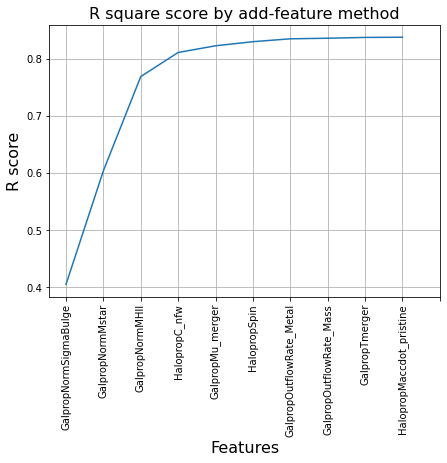

Elapsed time to run RF func on Group 8: 1464.612 seconds


In [5]:
# this code takes 1464.612 seconds ~ 24min to run when the dataset is Group 8 galaxies with ~7,000 entries
# and 10 most important features
start_time = time.time()

RF_results_8 = functions.target_predicting_RF_function(X=X_8, y=y_8)

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func on Group 8: {elapsed_time:.3f} seconds")

##### RF best parameters for Group 8, Galaxies with 0.7<$\frac{M_{bulge}}{M_{star}}$<0.8:

    Fitting 5 folds for each of 27 candidates, totalling 135 fits
    Best params, best score: 0.8329 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
    RF Accuracy: 0.83 (+/- 0.03)


#### The most important features for Group 8 galaxies are: 

	 1 GalpropNormSigmaBulge 0.4052934568211361
	 2 GalpropNormMstar 0.6040781082496883
	 3 GalpropNormMHII 0.768888785529549
	 4 HalopropC_nfw 0.8110192229923593
	 5 GalpropMu_merger 0.8227236630375273
	 6 HalopropSpin 0.8299002809259548
	 7 GalpropOutflowRate_Metal 0.8349386048016791
	 8 GalpropOutflowRate_Mass 0.8359605481393695
	 9 GalpropTmerger 0.8373681090424014
	 10 HalopropMaccdot_pristine 0.8377058655549435


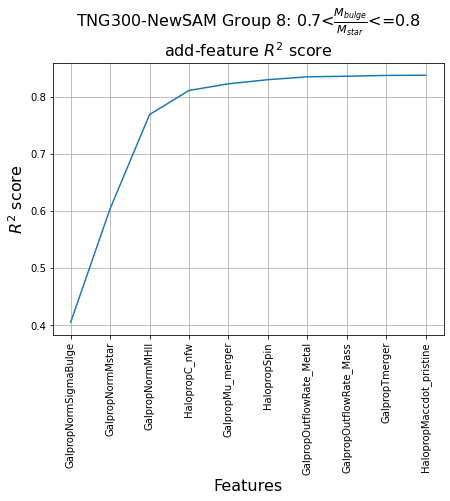

In [6]:
group8_fig_add_feature=RF_results_8[4].plot(x='features', y='r_sq_score', rot=90, figsize=(7,5), use_index=True,
                    legend=False, grid=True, 
                    xticks=range(0,10))
group8_fig_add_feature.set_title(label= r'TNG300-NewSAM Group 8: 0.7<$\frac{M_{bulge}}{M_{star}}$<=0.8' + '\n' + r'add-feature $R^{2}$ score',fontsize=16)
group8_fig_add_feature.set_xlabel('Features',fontsize=16)
group8_fig_add_feature.set_ylabel(r'$R^{2}$ score',fontsize=16)

# group8_fig_add_feature.get_figure().savefig('TNG300-SAM_images/v7_TNG300-SAM_df_8/v7_TNG300_Group_8_R_score_by_add_feature_method.jpg', dpi=500)

plt.show()

In [7]:
# RF_results_8[4].to_csv('TNG300-SAM_images/v7_TNG300-SAM_df_8/v7_TNG300_Group_8_Max_r_scores_by_add_column_method.csv', index=False)

group8 = pd.read_csv('TNG300-SAM_images/v7_TNG300-SAM_df_8/v7_TNG300_Group_8_Max_r_scores_by_add_column_method.csv')

group8_fig = RF_results_8[1]
# group8_fig.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_8/v7_TNG300_Group_8_RF_Prediction_vs_True.jpeg', dpi=500)
plt.show()

group8_fig_builtin_imp = RF_results_8[2]
# group8_fig_builtin_imp.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_8/v7_TNG300_Group_8_Built_in_Feature_Ranking.jpeg', dpi=500)
plt.show()

In [8]:
# y_pred_RF_df_8 = RF_results_8[0]
# y_pred_RF_df_8 = pd.DataFrame({'y_pred_RF Group 8': y_pred_RF_df_8})

# y_pred_RF_df_8.to_csv('TNG300-SAM_images/v7_TNG300-SAM_df_8/v7_TNG300-NewSAM_Group_8_y_pred_RF_predicted_sizes.csv', index=False)

y_pred_RF_8 = pd.read_csv('TNG300-SAM_images/v7_TNG300-SAM_df_8/v7_TNG300-NewSAM_Group_8_y_pred_RF_predicted_sizes.csv')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.8324 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
RF Accuracy: 0.83 (+/- 0.03)


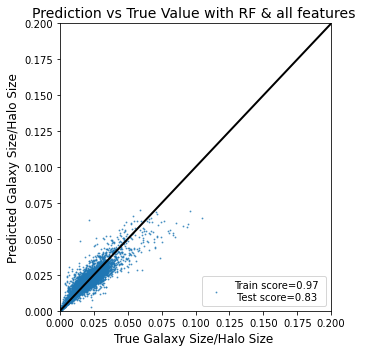

Elapsed time to compute the importances: 0.007 seconds
Elapsed time to compute the importances: 6.170 seconds


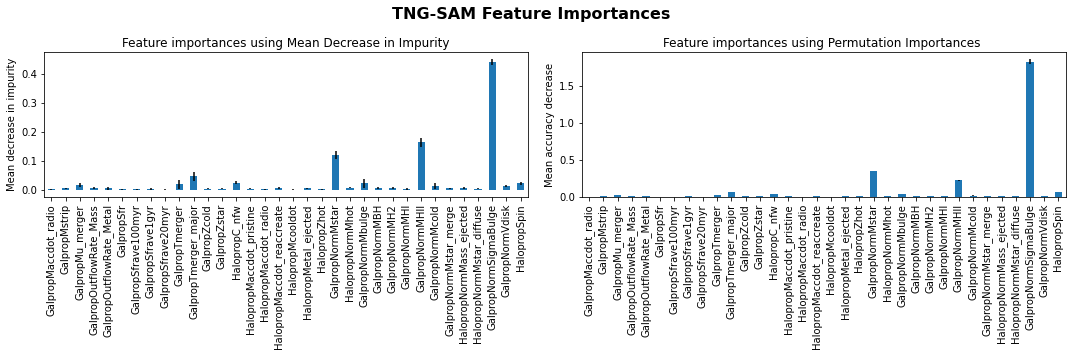

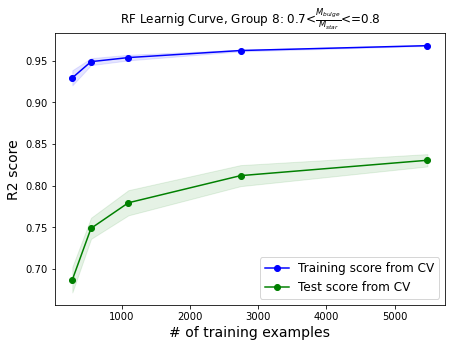

Elapsed time to run RF func and Learning Curves on Group 8 (0.7<B/M<=0.8): 164.300 seconds


In [9]:
# this code takes 164 seconds ~ 3min to run when the dataset is Group 8 galaxies with ~7,000 entries
start_time = time.time()

RF_lc_8 = tp_lc_functions.target_predicting_RF_function(X_8, y_8, r'RF Learnig Curve, Group 8: 0.7<$\frac{M_{bulge}}{M_{star}}$<=0.8')

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func and Learning Curves on Group 8 (0.7<B/M<=0.8): {elapsed_time:.3f} seconds")

In [10]:
lc_8 = RF_lc_8[4]
# lc_8.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_8/v7_TNG300_Group_8_RF_Learning_Curve.jpeg', dpi=500)

### <font color='purple'> <a id =10> </a> <br> RF & Feature Ranking by morphology: Group 9 Elliptical Galaxies, $\frac{M_{bulge}}{M_{star}}$>0.8

In [11]:
import os
# os.mkdir('TNG300-SAM_images/v7_TNG300-SAM_df_9')

In [12]:
df_9 = pd.read_csv('TNG300-SAM_images/v6_TNG300-SAM_Morphologies_definition/df_9_Normalized_as_defined_in_TNG300notebook_v6')
df_9_raw = pd.read_csv('TNG300-SAM_images/v6_TNG300-SAM_Morphologies_definition/df_9_Raw_as_defined_in_TNG300notebook_v6')
print("df_9.shape", df_9.shape)
print("df_9_raw.shape", df_9_raw.shape)

df_9.shape (10040, 38)
df_9_raw.shape (10040, 59)


In [13]:
X_9 = df_9.drop(columns=['GalpropNormHalfRadius', 'BulgeMstar_ratio',
                         'GalpropNormMdisk', 'DiskMstar_ratio'])
 

y_9 = df_9.loc[:,'GalpropNormHalfRadius']

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.7621 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
RF Accuracy: 0.76 (+/- 0.06)


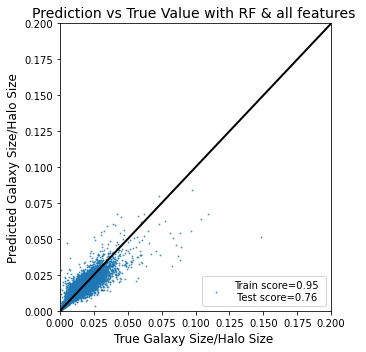

Elapsed time to compute the importances: 0.018 seconds
Elapsed time to compute the importances: 9.359 seconds


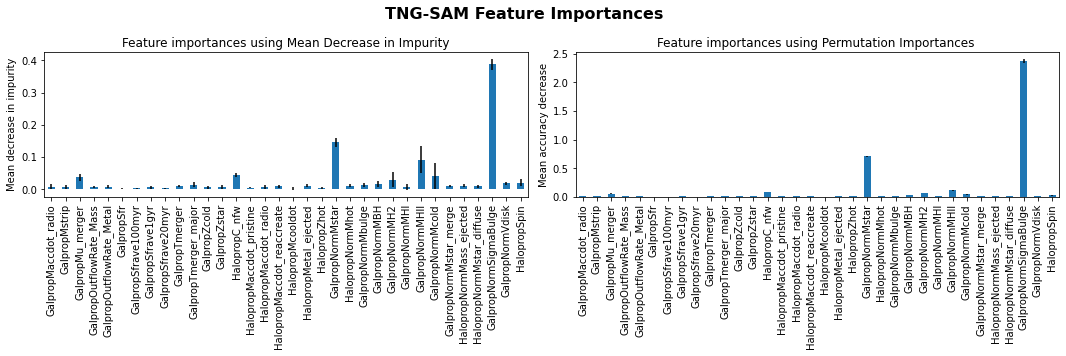

  0%|                                                    | 0/34 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▎                                          | 1/34 [00:01<00:56,  1.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▌                                         | 2/34 [00:03<00:57,  1.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|███▉                                        | 3/34 [00:05<00:54,  1.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▏                                      | 4/34 [00:06<00:48,  1.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▍                                     | 5/34 [00:08<00:46,  1.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 6/34 [00:09<00:45,  1.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 7/34 [00:11<00:44,  1.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▎                                 | 8/34 [00:12<00:40,  1.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▋                                | 9/34 [00:14<00:40,  1.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▋                              | 10/34 [00:15<00:35,  1.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▉                             | 11/34 [00:17<00:33,  1.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                           | 12/34 [00:18<00:33,  1.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▍                          | 13/34 [00:20<00:33,  1.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▋                         | 14/34 [00:22<00:32,  1.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 15/34 [00:23<00:26,  1.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▏                      | 16/34 [00:24<00:26,  1.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 17/34 [00:26<00:26,  1.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▊                    | 18/34 [00:27<00:19,  1.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 19/34 [00:29<00:21,  1.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▎                 | 20/34 [00:30<00:21,  1.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▌                | 21/34 [00:32<00:20,  1.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▊               | 22/34 [00:34<00:19,  1.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████              | 23/34 [00:36<00:19,  1.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▎            | 24/34 [00:37<00:16,  1.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▌           | 25/34 [00:38<00:13,  1.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▉          | 26/34 [00:40<00:12,  1.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████▏        | 27/34 [00:42<00:11,  1.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▍       | 28/34 [00:43<00:09,  1.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 29/34 [00:45<00:08,  1.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▉     | 30/34 [00:47<00:06,  1.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████▏   | 31/34 [00:48<00:05,  1.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 32/34 [00:50<00:03,  1.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 33/34 [00:51<00:01,  1.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 34/34 [00:53<00:00,  1.57s/it]


1. iteration: 
	 1 GalpropNormSigmaBulge 0.2933221120489446


  0%|                                                    | 0/33 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▎                                          | 1/33 [00:02<01:27,  2.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▋                                         | 2/33 [00:05<01:19,  2.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████                                        | 3/33 [00:08<01:23,  2.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 4/33 [00:11<01:22,  2.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▋                                     | 5/33 [00:14<01:20,  2.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|████████                                    | 6/33 [00:16<01:14,  2.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▎                                  | 7/33 [00:19<01:12,  2.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▋                                 | 8/33 [00:22<01:10,  2.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|████████████                                | 9/33 [00:24<01:04,  2.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                              | 10/33 [00:27<00:59,  2.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 11/33 [00:29<00:55,  2.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▋                           | 12/33 [00:32<00:53,  2.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 13/33 [00:34<00:50,  2.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 14/33 [00:36<00:47,  2.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▌                       | 15/33 [00:39<00:42,  2.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 16/33 [00:41<00:42,  2.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 17/33 [00:44<00:40,  2.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▍                   | 18/33 [00:46<00:34,  2.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▊                  | 19/33 [00:48<00:34,  2.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 20/33 [00:51<00:32,  2.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▎               | 21/33 [00:53<00:29,  2.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 22/33 [00:56<00:27,  2.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|█████████████████████████████▉             | 23/33 [00:58<00:24,  2.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▎           | 24/33 [01:01<00:22,  2.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 25/33 [01:04<00:20,  2.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▉         | 26/33 [01:06<00:17,  2.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▏       | 27/33 [01:09<00:15,  2.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▍      | 28/33 [01:12<00:13,  2.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▊     | 29/33 [01:14<00:10,  2.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████    | 30/33 [01:17<00:08,  2.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 31/33 [01:19<00:05,  2.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 32/33 [01:22<00:02,  2.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 33/33 [01:25<00:00,  2.58s/it]


2. iteration: 
	 1 GalpropNormSigmaBulge 0.2933221120489446
	 2 GalpropNormMstar 0.5070182594774185


  0%|                                                    | 0/32 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/32 [00:04<02:06,  4.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/32 [00:08<02:00,  4.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████▏                                       | 3/32 [00:12<01:57,  4.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▌                                      | 4/32 [00:16<01:53,  4.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|██████▉                                     | 5/32 [00:19<01:43,  3.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▎                                   | 6/32 [00:23<01:41,  3.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▋                                  | 7/32 [00:27<01:37,  3.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 8/32 [00:31<01:34,  3.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▍                               | 9/32 [00:35<01:30,  3.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▍                             | 10/32 [00:39<01:26,  3.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 11/32 [00:43<01:21,  3.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▏                          | 12/32 [00:47<01:18,  3.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▍                         | 13/32 [00:51<01:15,  3.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▊                        | 14/32 [00:54<01:08,  3.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▏                      | 15/32 [00:58<01:02,  3.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 16/32 [01:01<00:57,  3.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▊                    | 17/32 [01:05<00:55,  3.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████▏                  | 18/32 [01:08<00:48,  3.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▌                 | 19/32 [01:12<00:46,  3.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▉                | 20/32 [01:16<00:44,  3.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 21/32 [01:20<00:42,  3.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▌             | 22/32 [01:24<00:38,  3.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 23/32 [01:28<00:34,  3.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 24/32 [01:32<00:30,  3.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▌         | 25/32 [01:35<00:27,  3.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▉        | 26/32 [01:40<00:23,  3.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████▎      | 27/32 [01:44<00:19,  3.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▋     | 28/32 [01:47<00:15,  3.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|██████████████████████████████████████▉    | 29/32 [01:51<00:11,  3.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▎  | 30/32 [01:55<00:07,  3.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 31/32 [01:59<00:03,  3.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 32/32 [02:03<00:00,  3.86s/it]


3. iteration: 
	 1 GalpropNormSigmaBulge 0.2933221120489446
	 2 GalpropNormMstar 0.5070182594774185
	 3 HalopropMaccdot_radio 0.6669119276649432


  0%|                                                    | 0/31 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/31 [00:04<02:24,  4.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/31 [00:09<02:20,  4.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▎                                       | 3/31 [00:14<02:17,  4.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▋                                      | 4/31 [00:19<02:12,  4.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 5/31 [00:24<02:08,  4.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▌                                   | 6/31 [00:29<02:03,  4.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|█████████▉                                  | 7/31 [00:34<01:58,  4.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▎                                | 8/31 [00:39<01:53,  4.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▊                               | 9/31 [00:44<01:48,  4.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▊                             | 10/31 [00:49<01:43,  4.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▎                           | 11/31 [00:54<01:37,  4.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▋                          | 12/31 [00:58<01:33,  4.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████                         | 13/31 [01:03<01:28,  4.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▍                       | 14/31 [01:08<01:23,  4.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 15/31 [01:13<01:16,  4.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 16/31 [01:18<01:12,  4.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▌                   | 17/31 [01:22<01:05,  4.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▉                  | 18/31 [01:27<01:01,  4.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▎                | 19/31 [01:32<00:57,  4.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▋               | 20/31 [01:37<00:53,  4.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 21/31 [01:42<00:48,  4.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▌            | 22/31 [01:47<00:43,  4.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▉           | 23/31 [01:52<00:39,  4.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▎         | 24/31 [01:56<00:33,  4.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 25/31 [02:01<00:29,  4.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 26/31 [02:07<00:25,  5.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▍     | 27/31 [02:12<00:20,  5.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▊    | 28/31 [02:16<00:14,  4.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▏  | 29/31 [02:22<00:09,  4.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 30/31 [02:27<00:05,  5.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 31/31 [02:32<00:00,  4.91s/it]


4. iteration: 
	 1 GalpropNormSigmaBulge 0.2933221120489446
	 2 GalpropNormMstar 0.5070182594774185
	 3 HalopropMaccdot_radio 0.6669119276649432
	 4 HalopropC_nfw 0.7206598254860047


  0%|                                                    | 0/30 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/30 [00:06<02:58,  6.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|██▉                                         | 2/30 [00:12<02:50,  6.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▍                                       | 3/30 [00:18<02:46,  6.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▊                                      | 4/30 [00:25<02:44,  6.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 5/30 [00:30<02:34,  6.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 6/30 [00:37<02:30,  6.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▎                                 | 7/30 [00:43<02:22,  6.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▋                                | 8/30 [00:49<02:15,  6.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▏                              | 9/30 [00:54<02:02,  5.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 10/30 [01:01<02:00,  6.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▊                           | 11/30 [01:06<01:53,  5.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 12/30 [01:13<01:50,  6.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▋                        | 13/30 [01:19<01:43,  6.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████                       | 14/30 [01:25<01:35,  5.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 15/30 [01:31<01:31,  6.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▉                    | 16/30 [01:36<01:21,  5.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▎                  | 17/30 [01:42<01:17,  5.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 18/30 [01:48<01:11,  5.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████▏               | 19/30 [01:54<01:05,  5.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 20/30 [02:00<00:59,  5.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████             | 21/30 [02:06<00:53,  5.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▌           | 22/30 [02:13<00:49,  6.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|████████████████████████████████▉          | 23/30 [02:19<00:43,  6.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 24/30 [02:26<00:38,  6.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 25/30 [02:32<00:32,  6.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▎     | 26/30 [02:39<00:26,  6.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▋    | 27/30 [02:45<00:19,  6.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████▏  | 28/30 [02:52<00:12,  6.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 29/30 [02:58<00:06,  6.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 30/30 [03:03<00:00,  6.11s/it]


5. iteration: 
	 1 GalpropNormSigmaBulge 0.2933221120489446
	 2 GalpropNormMstar 0.5070182594774185
	 3 HalopropMaccdot_radio 0.6669119276649432
	 4 HalopropC_nfw 0.7206598254860047
	 5 GalpropSfr 0.7319530706623268


  0%|                                                    | 0/29 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▌                                          | 1/29 [00:07<03:29,  7.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███                                         | 2/29 [00:15<03:24,  7.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▌                                       | 3/29 [00:23<03:21,  7.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████                                      | 4/29 [00:30<03:12,  7.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▌                                    | 5/29 [00:38<03:03,  7.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 6/29 [00:45<02:55,  7.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 7/29 [00:51<02:35,  7.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▏                               | 8/29 [00:59<02:30,  7.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▋                              | 9/29 [01:06<02:24,  7.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 10/29 [01:13<02:18,  7.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▎                          | 11/29 [01:21<02:11,  7.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▊                         | 12/29 [01:28<02:05,  7.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▎                       | 13/29 [01:36<01:57,  7.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 14/29 [01:43<01:51,  7.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 15/29 [01:50<01:40,  7.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▋                   | 16/29 [01:58<01:35,  7.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▏                 | 17/29 [02:05<01:29,  7.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▋                | 18/29 [02:13<01:22,  7.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 19/29 [02:20<01:14,  7.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▋             | 20/29 [02:28<01:07,  7.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|███████████████████████████████▏           | 21/29 [02:36<01:00,  7.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 22/29 [02:43<00:53,  7.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████         | 23/29 [02:51<00:46,  7.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▌       | 24/29 [02:59<00:38,  7.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|█████████████████████████████████████      | 25/29 [03:07<00:30,  7.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▌    | 26/29 [03:14<00:23,  7.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████   | 27/29 [03:22<00:15,  7.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 28/29 [03:30<00:07,  7.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 29/29 [03:37<00:00,  7.51s/it]


6. iteration: 
	 1 GalpropNormSigmaBulge 0.2933221120489446
	 2 GalpropNormMstar 0.5070182594774185
	 3 HalopropMaccdot_radio 0.6669119276649432
	 4 HalopropC_nfw 0.7206598254860047
	 5 GalpropSfr 0.7319530706623268
	 6 HalopropSpin 0.7430231382838445


  0%|                                                    | 0/28 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▌                                          | 1/28 [00:08<03:52,  8.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▏                                        | 2/28 [00:17<03:42,  8.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▋                                       | 3/28 [00:25<03:34,  8.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████▎                                     | 4/28 [00:34<03:27,  8.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 5/28 [00:43<03:18,  8.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▍                                  | 6/28 [00:51<03:09,  8.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 7/28 [01:00<03:00,  8.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▌                               | 8/28 [01:08<02:51,  8.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████▏                             | 9/28 [01:17<02:43,  8.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▎                           | 10/28 [01:25<02:34,  8.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 11/28 [01:34<02:25,  8.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▍                        | 12/28 [01:43<02:17,  8.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▉                       | 13/28 [01:51<02:07,  8.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 14/28 [01:59<01:59,  8.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████                    | 15/28 [02:07<01:47,  8.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▌                  | 16/28 [02:16<01:40,  8.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 17/28 [02:24<01:32,  8.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▋               | 18/28 [02:33<01:24,  8.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 19/28 [02:42<01:16,  8.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▋            | 20/28 [02:50<01:08,  8.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 21/28 [02:59<01:00,  8.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▊         | 22/28 [03:08<00:51,  8.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▎       | 23/28 [03:17<00:43,  8.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 24/28 [03:25<00:35,  8.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▍    | 25/28 [03:34<00:26,  8.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▉   | 26/28 [03:43<00:17,  8.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 27/28 [03:51<00:08,  8.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 28/28 [03:58<00:00,  8.54s/it]


7. iteration: 
	 1 GalpropNormSigmaBulge 0.2933221120489446
	 2 GalpropNormMstar 0.5070182594774185
	 3 HalopropMaccdot_radio 0.6669119276649432
	 4 HalopropC_nfw 0.7206598254860047
	 5 GalpropSfr 0.7319530706623268
	 6 HalopropSpin 0.7430231382838445
	 7 GalpropMu_merger 0.7433078090033192


  0%|                                                    | 0/27 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/27 [00:09<04:11,  9.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▎                                        | 2/27 [00:19<04:02,  9.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▉                                       | 3/27 [00:29<03:54,  9.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▌                                     | 4/27 [00:38<03:43,  9.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▏                                   | 5/27 [00:48<03:34,  9.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▊                                  | 6/27 [00:58<03:24,  9.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▍                                | 7/27 [01:08<03:14,  9.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                               | 8/27 [01:17<03:04,  9.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 9/27 [01:27<02:54,  9.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▉                           | 10/27 [01:37<02:44,  9.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▌                         | 11/27 [01:46<02:35,  9.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████                        | 12/27 [01:56<02:24,  9.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 13/27 [02:06<02:15,  9.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 14/27 [02:14<02:02,  9.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|███████████████████████▉                   | 15/27 [02:24<01:54,  9.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▍                 | 16/27 [02:34<01:45,  9.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████                | 17/27 [02:44<01:36,  9.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 18/27 [02:54<01:27,  9.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████▎            | 19/27 [03:03<01:17,  9.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▊           | 20/27 [03:13<01:08,  9.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▍         | 21/27 [03:23<00:59,  9.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|███████████████████████████████████        | 22/27 [03:33<00:49,  9.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 23/27 [03:43<00:39,  9.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▏    | 24/27 [03:53<00:29,  9.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▊   | 25/27 [04:03<00:19,  9.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 26/27 [04:13<00:09,  9.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 27/27 [04:22<00:00,  9.74s/it]


8. iteration: 
	 1 GalpropNormSigmaBulge 0.2933221120489446
	 2 GalpropNormMstar 0.5070182594774185
	 3 HalopropMaccdot_radio 0.6669119276649432
	 4 HalopropC_nfw 0.7206598254860047
	 5 GalpropSfr 0.7319530706623268
	 6 HalopropSpin 0.7430231382838445
	 7 GalpropMu_merger 0.7433078090033192
	 8 GalpropTmerger 0.7555115123434853


  0%|                                                    | 0/26 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/26 [00:10<04:28, 10.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▍                                        | 2/26 [00:21<04:18, 10.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████                                       | 3/26 [00:32<04:09, 10.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▊                                     | 4/26 [00:43<03:58, 10.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▍                                   | 5/26 [00:54<03:47, 10.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▏                                 | 6/26 [01:05<03:40, 11.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▊                                | 7/26 [01:16<03:27, 10.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▌                              | 8/26 [01:26<03:14, 10.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                            | 9/26 [01:37<03:03, 10.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                          | 10/26 [01:48<02:52, 10.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 11/26 [01:58<02:39, 10.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▊                       | 12/26 [02:09<02:28, 10.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 13/26 [02:19<02:15, 10.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▏                   | 14/26 [02:29<02:05, 10.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▊                  | 15/26 [02:38<01:49,  9.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▍                | 16/26 [02:49<01:41, 10.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|████████████████████████████               | 17/26 [02:59<01:33, 10.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▊             | 18/26 [03:10<01:24, 10.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▍           | 19/26 [03:22<01:14, 10.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████          | 20/26 [03:33<01:05, 10.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 21/26 [03:44<00:54, 10.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▍      | 22/26 [03:55<00:43, 10.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|██████████████████████████████████████     | 23/26 [04:06<00:32, 11.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▋   | 24/26 [04:17<00:22, 11.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 25/26 [04:28<00:10, 10.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 26/26 [04:39<00:00, 10.74s/it]


9. iteration: 
	 1 GalpropNormSigmaBulge 0.2933221120489446
	 2 GalpropNormMstar 0.5070182594774185
	 3 HalopropMaccdot_radio 0.6669119276649432
	 4 HalopropC_nfw 0.7206598254860047
	 5 GalpropSfr 0.7319530706623268
	 6 HalopropSpin 0.7430231382838445
	 7 GalpropMu_merger 0.7433078090033192
	 8 GalpropTmerger 0.7555115123434853
	 9 HalopropMetal_ejected 0.7578002165333918


  0%|                                                    | 0/25 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▊                                          | 1/25 [00:11<04:42, 11.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▌                                        | 2/25 [00:23<04:32, 11.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 3/25 [00:35<04:21, 11.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 4/25 [00:47<04:09, 11.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 5/25 [00:59<03:56, 11.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 6/25 [01:10<03:44, 11.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▎                               | 7/25 [01:22<03:32, 11.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████                              | 8/25 [01:34<03:20, 11.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▊                            | 9/25 [01:46<03:09, 11.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 10/25 [01:58<02:57, 11.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 11/25 [02:09<02:43, 11.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 12/25 [02:21<02:31, 11.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 13/25 [02:32<02:18, 11.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 14/25 [02:44<02:07, 11.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 15/25 [02:56<01:57, 11.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▌               | 16/25 [03:08<01:45, 11.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 17/25 [03:19<01:33, 11.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 18/25 [03:31<01:22, 11.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▋          | 19/25 [03:43<01:11, 11.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 20/25 [03:56<01:00, 12.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 21/25 [04:08<00:48, 12.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▊     | 22/25 [04:20<00:35, 11.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▌   | 23/25 [04:32<00:23, 11.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 24/25 [04:44<00:11, 11.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 25/25 [04:55<00:00, 11.83s/it]

10. iteration: 
	 1 GalpropNormSigmaBulge 0.2933221120489446
	 2 GalpropNormMstar 0.5070182594774185
	 3 HalopropMaccdot_radio 0.6669119276649432
	 4 HalopropC_nfw 0.7206598254860047
	 5 GalpropSfr 0.7319530706623268
	 6 HalopropSpin 0.7430231382838445
	 7 GalpropMu_merger 0.7433078090033192
	 8 GalpropTmerger 0.7555115123434853
	 9 HalopropMetal_ejected 0.7578002165333918
	 10 GalpropNormMstar_merge 0.7620606092767703


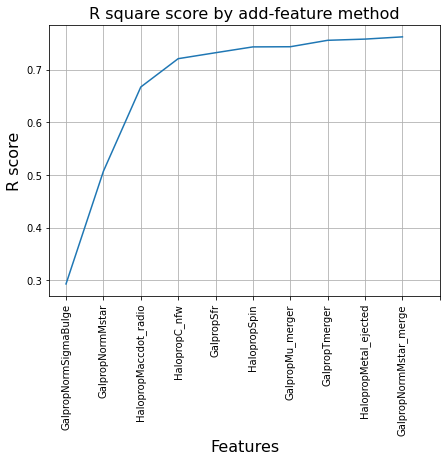

Elapsed time to run RF func on Group 9: 2138.932 seconds


In [14]:
# this code takes ... seconds ~...hrs to run when the dataset is Group 9 galaxies with 10,000 entries
# and 10 most important features
start_time = time.time()

RF_results_9 = functions.target_predicting_RF_function(X=X_9, y=y_9)

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func on Group 9: {elapsed_time:.3f} seconds")

##### RF best parameters for Group 9, Elliptical Galaxies with $\frac{M_{bulge}}{M_{star}}$>0.8:

    Fitting 5 folds for each of 27 candidates, totalling 135 fits
    Best params, best score: 0.7621 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
    RF Accuracy: 0.76 (+/- 0.06)
        

#### The most important features for Group 9 galaxies are: 

	 1 GalpropNormSigmaBulge 0.2933221120489446
	 2 GalpropNormMstar 0.5070182594774185
	 3 HalopropMaccdot_radio 0.6669119276649432
	 4 HalopropC_nfw 0.7206598254860047
	 5 GalpropSfr 0.7319530706623268
	 6 HalopropSpin 0.7430231382838445
	 7 GalpropMu_merger 0.7433078090033192
	 8 GalpropTmerger 0.7555115123434853
	 9 HalopropMetal_ejected 0.7578002165333918
	 10 GalpropNormMstar_merge 0.7620606092767703

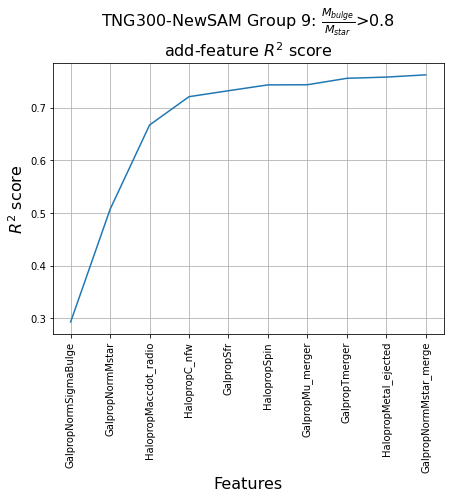

In [15]:
group9_fig_add_feature=RF_results_9[4].plot(x='features', y='r_sq_score', rot=90, figsize=(7,5), use_index=True,
                    legend=False, grid=True, 
                    xticks=range(0,10))
group9_fig_add_feature.set_title(label= r'TNG300-NewSAM Group 9: $\frac{M_{bulge}}{M_{star}}$>0.8' + '\n' + r'add-feature $R^{2}$ score',fontsize=16)
group9_fig_add_feature.set_xlabel('Features',fontsize=16)
group9_fig_add_feature.set_ylabel(r'$R^{2}$ score',fontsize=16)

# group9_fig_add_feature.get_figure().savefig('TNG300-SAM_images/v7_TNG300-SAM_df_9/v7_TNG300_Group_9_R_score_by_add_feature_method.jpg', dpi=500)

plt.show()

In [16]:
# RF_results_9[4].to_csv('TNG300-SAM_images/v7_TNG300-SAM_df_9/v7_TNG300_Group_9_Max_r_scores_by_add_column_method.csv', index=False)

group9 = pd.read_csv('TNG300-SAM_images/v7_TNG300-SAM_df_9/v7_TNG300_Group_9_Max_r_scores_by_add_column_method.csv')

group9_fig = RF_results_9[1]
# group9_fig.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_9/v7_TNG300_Group_9_RF_Prediction_vs_True.jpeg', dpi=500)
plt.show()

group9_fig_builtin_imp = RF_results_9[2]
# group9_fig_builtin_imp.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_9/v7_TNG300_Group_9_Built_in_Feature_Ranking.jpeg', dpi=500)
plt.show()

In [17]:
# y_pred_RF_df_9 = RF_results_9[0]
# y_pred_RF_df_9 = pd.DataFrame({'y_pred_RF Group 9': y_pred_RF_df_9})

# y_pred_RF_df_9.to_csv('TNG300-SAM_images/v7_TNG300-SAM_df_9/v7_TNG300-NewSAM_Group_9_y_pred_RF_predicted_sizes.csv', index=False)

y_pred_RF_9 = pd.read_csv('TNG300-SAM_images/v7_TNG300-SAM_df_9/v7_TNG300-NewSAM_Group_9_y_pred_RF_predicted_sizes.csv')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.7538 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 100}
RF Accuracy: 0.76 (+/- 0.06)


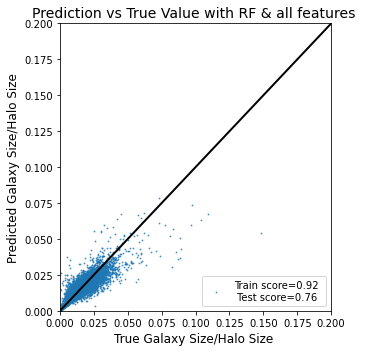

Elapsed time to compute the importances: 0.016 seconds
Elapsed time to compute the importances: 7.864 seconds


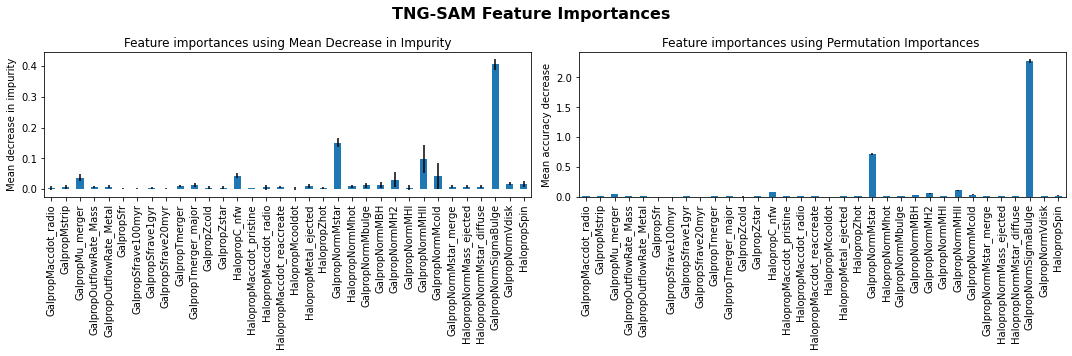

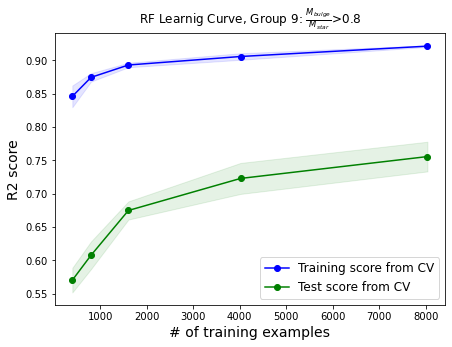

Elapsed time to run RF func and Learning Curves on Group 9 (B/M>0.8): 256.549 seconds


In [18]:
# this code takes 256.549seconds ~ 4.3min to run when the dataset is Group 9 galaxies with ~10,000 entries 
start_time = time.time()

RF_lc_9 = tp_lc_functions.target_predicting_RF_function(X_9, y_9, r'RF Learnig Curve, Group 9: $\frac{M_{bulge}}{M_{star}}$>0.8')

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func and Learning Curves on Group 9 (B/M>0.8): {elapsed_time:.3f} seconds")

In [19]:
lc_9 = RF_lc_9[4]
# lc_9.savefig('TNG300-SAM_images/v7_TNG300-SAM_df_9/v7_TNG300_Group_9_RF_Learning_Curve.jpeg', dpi=500)